In [ ]:
!git clone https://github.com/Tiiiger/bert_score


Cloning into 'bert_score'...
remote: Enumerating objects: 881, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 881 (delta 139), reused 229 (delta 130), pack-reused 638
Receiving objects: 100% (881/881), 1.32 MiB | 2.04 MiB/s, done.
Resolving deltas: 100% (454/454), done.


In [ ]:
cd bert_score


/content/bert_score


In [ ]:
!pip install .


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/bert_score
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 4.9 MB 2.2 MB/s 
     |████████████████████████████████| 120 kB 42.4 MB/s 
     |████████████████████████████████| 6.6 MB 33.0 MB/s 
  Created wheel for bert-score: filename=bert_score-0.3.11-py3-none-any.whl size=60607 sha256=b748c4c4f7391912d96c5121bc8dffc4dc36129cd87eb3caa4939bbd9ecc9e2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-8qbpwxhj/wheels/a7/12/f8/8da4f6ac6ff005e9a0202402458a4b37dc94d267cd0624459d
Successfully bui

In [ ]:
!python -m unittest discover


Downloading: 100% 482/482 [00:00<00:00, 403kB/s]
Downloading: 100% 899k/899k [00:01<00:00, 779kB/s] 
Downloading: 100% 456k/456k [00:01<00:00, 396kB/s]
Downloading: 100% 1.43G/1.43G [00:45<00:00, 31.0MB/s]
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
FSome weights of the model checkpoint at roberta-large were not used when initializing Rob

In [ ]:
pwd

'/content/bert_score'

In [ ]:
ls

bert_score/      get_rescale_baseline/  README.md         tests/
bert_score_cli/  journal/               reproduce/        tune_layers/
bert_score.png   LICENSE                requirements.txt  upload_pypi.sh
example/         MANIFEST.in            setup.py


In [ ]:
!bert-score -r ../test.txt.raw -c ../DRS-raw.txt --lang en

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
roberta-large_L17_no-idf_version=0.3.11(hug_trans=4.22.1)_fast-tokenizer P: 0.871176 R: 0.871603 F1: 0.870813


In [ ]:
!python ../shuffle.py ../output1.seq.out

In [ ]:
!bert-score-show --lang en -r example/DRS-Ref.txt -c example/DRS-Hyps.txt -f out.png


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Saved figure to file:  out.png
Figure(800x900)


 **This code is to shuffle the lines in text file. 
code below should be saved in shuffle.py file and run the given below command to execute the code.**
python shuffle.py demo.txt

In [ ]:
import random
import argparse
import sys
import os
import time

parser = argparse.ArgumentParser()
parser.add_argument('file_name', help='Provide the file name')
args = parser.parse_args()

inputFilename = args.file_name

if not os.path.exists(inputFilename):
    print(f'The file {inputFilename} does not exist. Quitting...')
    sys.exit()


class ShuffleLine:

    def __init__(self, inp_file):
        self.file_name = inp_file

    # Shuffling with help of list of tuples
    def shuffle_read(self):
        file_name = self.file_name
        with open(file_name, 'r') as f:
            data = [(random.random(), line) for line in f]
        data.sort()
        with open(file_name, 'w') as target:
            for _, line in data:
                target.write(line)
        return len(data)

    # Shuffling via random.shuffle(method) and then writing the shuffled
    # content to the same file
    def shuffle_readline(self):
        file_name = self.file_name
        with open(file_name, 'r') as f:
            lines = f.readlines()
            random.shuffle(lines)

        with open(file_name, 'w') as f:
            f.writelines(lines)

        return len(lines)


def main():

    obj = ShuffleLine(inputFilename)

    print('Method 1')
    t1 = time.time()
    num_lines = obj.shuffle_readline()
    t2 = time.time()
    print(f'Total time taken {t2-t1} seconds to shuffle {num_lines} lines.')

    print('\nMethod 2')
    t1 = time.time()
    num_lines = obj.shuffle_read()
    t2 = time.time()
    print(f'Total time taken {t2-t1} seconds to shuffle {num_lines} lines.')


if __name__ == '__main__':
    main()

usage: ipykernel_launcher.py [-h] file_name
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
!python ../shuffle.py ../DRS-raw.txt

Method 1
Total time taken 0.0012216567993164062 seconds to shuffle 897 lines.

Method 2
Total time taken 0.0010759830474853516 seconds to shuffle 897 lines.


**To generate histograms of the target shuffled values...**

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('target-shuffling.csv')


In [ ]:
df.head(1)


,BLEU,NIST,METEOR,ROUGE_L,CIDEr,Precision,Recall,F1-Score
0,0.27,0.5474,2.06,4.97,0.0346,0.871822,0.871822,0.871822


In [ ]:
import matplotlib.pyplot as plt


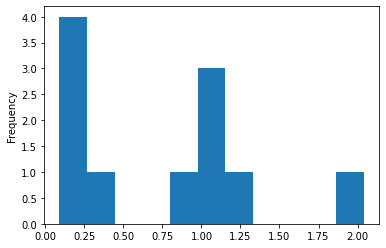

In [ ]:
df['BLEU'].plot(kind='hist',bins=11)


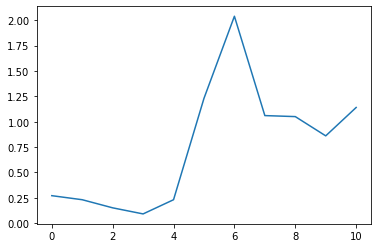

In [ ]:
plt.plot(df['BLEU'])

(array([5., 0., 0., 1., 2., 2., 0., 0., 0., 1.]),
 array([0.09 , 0.285, 0.48 , 0.675, 0.87 , 1.065, 1.26 , 1.455, 1.65 ,
        1.845, 2.04 ]),
 <a list of 10 Patch objects>)

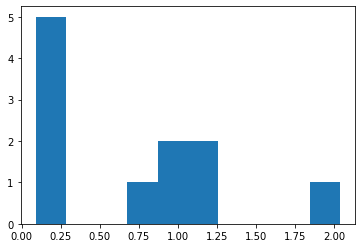

In [ ]:
plt.hist(df['BLEU'])


In [ ]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


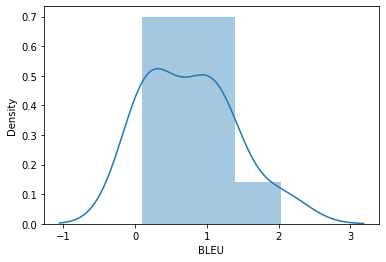

In [ ]:
sns.distplot(df['BLEU'])


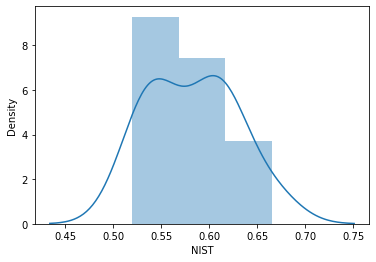

In [ ]:
sns.distplot(df['NIST'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


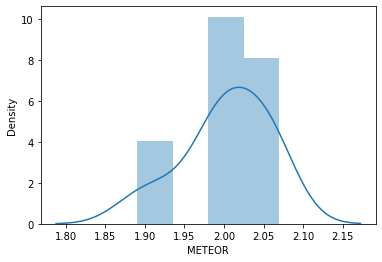

In [ ]:
sns.distplot(df['METEOR'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


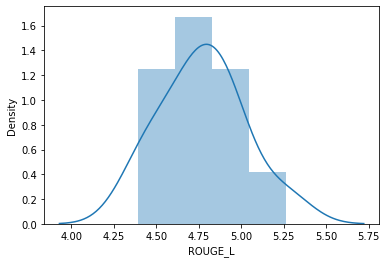

In [ ]:
sns.distplot(df['ROUGE_L'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


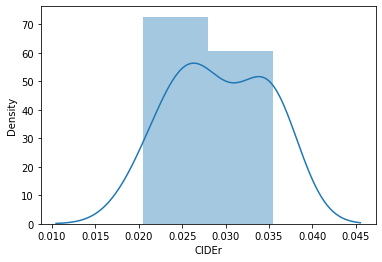

In [ ]:
sns.distplot(df['CIDEr'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


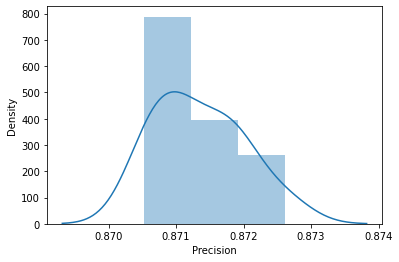

In [ ]:
sns.distplot(df['Precision'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


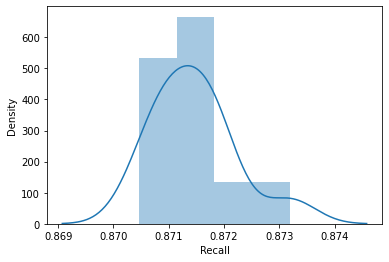

In [ ]:
sns.distplot(df['Recall'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


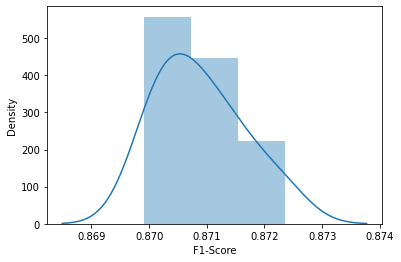

In [ ]:
sns.distplot(df['F1-Score'])


**Code to randomize the output1.seq.out file**

In [ ]:
import random
with open('../output1.seq.out','r') as source:
    data = [ (random.random(), line) for line in source ]
data.sort()
with open('../1.txt','w') as target:
    for _, line in data:
        target.write( line )

Shapiro-wilk test for data normality check

In [ ]:
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn
  
seed(0)
# Create data
gfg_data = poisson(5, 200)
  
# conduct the  Shapiro-Wilk Test
shapiro(gfg_data)

ShapiroResult(statistic=0.966901957988739, pvalue=0.00011927181185455993)

In [ ]:
# Read Text Files with Pandas using read_csv()
  
# importing pandas
import pandas as pd
  
# read text file into pandas DataFrame
df = pd.read_csv("gfg.txt", sep=" ")
  
# display DataFrame
print(df)

      20.547995616750768
0             100.000000
1              14.058533
2              10.682175
3              15.619700
4              57.991507
...                  ...
3586           10.682175
3587           37.991784
3588           18.995892
3589           30.739408
3590           27.516060

[3591 rows x 1 columns]


In [ ]:
shapiro(df)

ShapiroResult(statistic=0.8639757037162781, pvalue=0.0)